In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


In [14]:
# Load the Iris dataset
data = pd.read_csv('/kaggle/input/iris-dataset/Iris.csv')
# Split the data into features and target
X = data.drop('Species', axis=1)
y = data['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
print(data.shape)
data.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()
# fit our data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [17]:
# Make predictions on the test set
y_pred = clf.predict(X_test)



In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


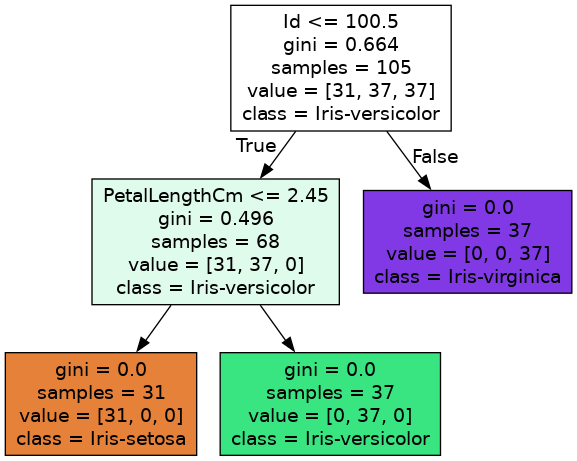

In [19]:
# Export the decision tree to a DOT file
export_graphviz(clf, out_file="tree.dot", feature_names=X.columns,
                class_names=data['Species'].unique(), filled=True)

# Convert the DOT file to an image (e.g., PNG)
# Example using graphviz library:
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = "png"  # Set the desired format (e.g., "png", "pdf")
graph.render("decision_tree")  # Save the image as "decision_tree.png"

Image(filename="decision_tree.png")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


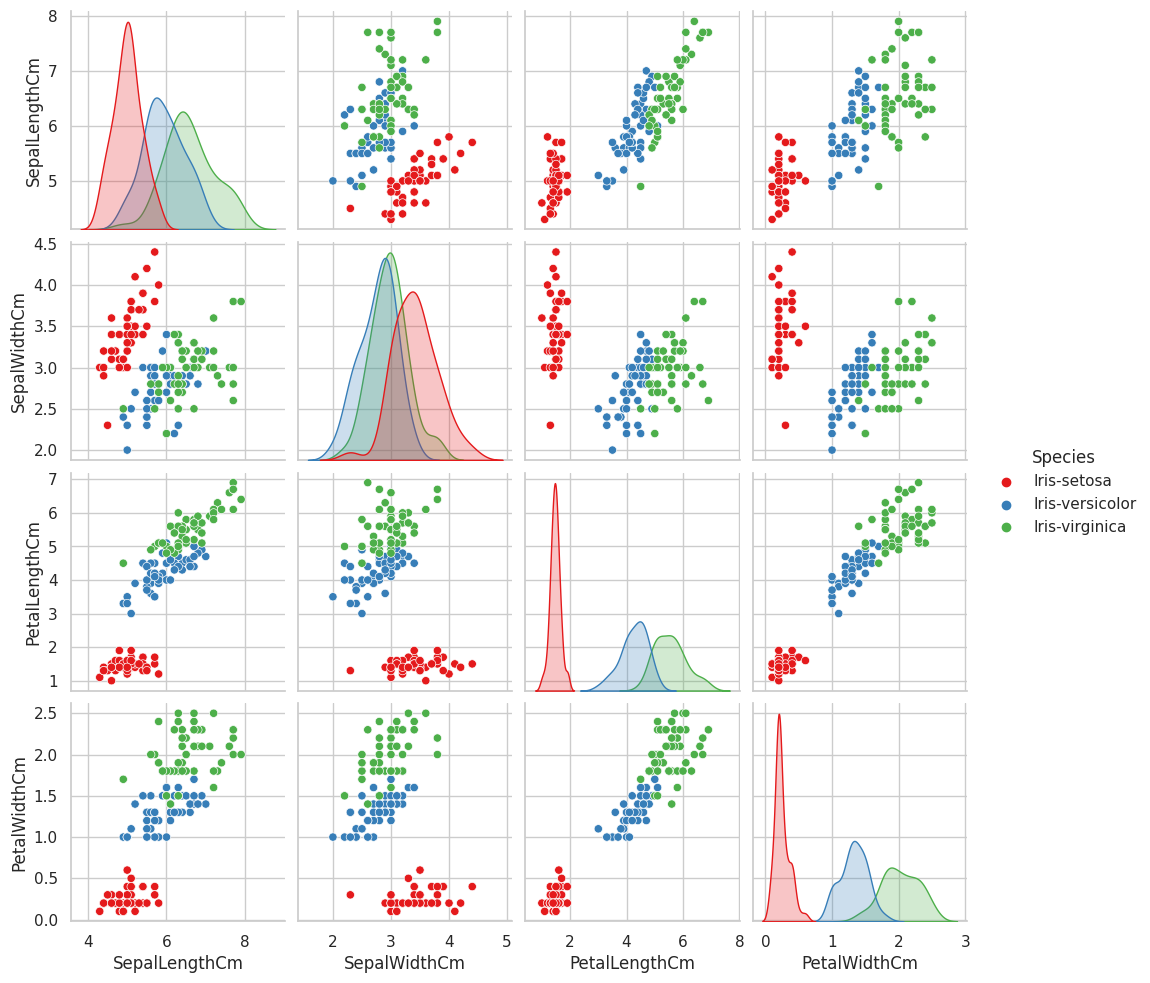

In [20]:
# Specify column names
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create a DataFrame for pair plot visualization
data_df = pd.DataFrame(data=data, columns=feature_names + ['Species'])

target_column = 'Species'

# Set Seaborn style
sns.set(style='whitegrid')

# Create a pair plot
sns.pairplot(data_df, hue=target_column, palette='Set1', height=2.5)
plt.show()
